### Data description

The dataset provided contains historical stock prices (for the last 5 years) for all companies currently found on the S&P 500 index. 

The file provided has the following columns:
Date - in format: yy-mm-dd

Open - price of the stock at market open (this is NYSE data so all in USD)

High - Highest price reached in the day

Low Close - Lowest price reached in the day

Volume - Number of shares traded

Name - the stock's ticker name

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)
import datetime 
import calendar


In [2]:
stocks = pd.read_csv (r'C:\Users\sylve\Downloads\ConfluxAI classes_notebooks\Project 2\all_stocks_5yr.csv')   #read the csv file (put 'r' before the path string to address any special characters in the path, such as '\'). Don't forget to put the file name at the end of the path + ".csv"
print (stocks)

              date   open   high    low  close    volume Name
0       2013-02-08  15.07  15.12  14.63  14.75   8407500  AAL
1       2013-02-11  14.89  15.01  14.26  14.46   8882000  AAL
2       2013-02-12  14.45  14.51  14.10  14.27   8126000  AAL
3       2013-02-13  14.30  14.94  14.25  14.66  10259500  AAL
4       2013-02-14  14.94  14.96  13.16  13.99  31879900  AAL
...            ...    ...    ...    ...    ...       ...  ...
619035  2018-02-01  76.84  78.27  76.69  77.82   2982259  ZTS
619036  2018-02-02  77.53  78.12  76.73  76.78   2595187  ZTS
619037  2018-02-05  76.64  76.92  73.18  73.83   2962031  ZTS
619038  2018-02-06  72.74  74.56  72.13  73.27   4924323  ZTS
619039  2018-02-07  72.70  75.00  72.69  73.86   4534912  ZTS

[619040 rows x 7 columns]


In [3]:
stocks.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [4]:
stocks.tail()

,date,open,high,low,close,volume,Name
619035,2018-02-01,76.84,78.27,76.69,77.82,2982259,ZTS
619036,2018-02-02,77.53,78.12,76.73,76.78,2595187,ZTS
619037,2018-02-05,76.64,76.92,73.18,73.83,2962031,ZTS
619038,2018-02-06,72.74,74.56,72.13,73.27,4924323,ZTS
619039,2018-02-07,72.70,75.00,72.69,73.86,4534912,ZTS


In [5]:
stocks.dtypes

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
Name       object
dtype: object

In [6]:
stocks['date'] = pd.to_datetime(stocks['date']) # Changing ‘Date’ column from an object to be a datetime object

In [7]:
stocks.dtypes

date      datetime64[ns]
open             float64
high             float64
low              float64
close            float64
volume             int64
Name              object
dtype: object

In [8]:
stocks.shape

(619040, 7)

In [9]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
date      619040 non-null datetime64[ns]
open      619029 non-null float64
high      619032 non-null float64
low       619032 non-null float64
close     619040 non-null float64
volume    619040 non-null int64
Name      619040 non-null object
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 33.1+ MB


In [10]:
stocks.isnull().any()

date      False
open       True
high       True
low        True
close     False
volume    False
Name      False
dtype: bool

In [11]:
stocks.isnull().sum()

date       0
open      11
high       8
low        8
close      0
volume     0
Name       0
dtype: int64

In [12]:
stocks.isnull().sum().sum()

27

In [13]:
mean_open = stocks['open'].mean()
mean_high = stocks['high'].mean()
mean_low = stocks['low'].mean()

In [14]:
stocks['open']=stocks['open'].fillna(mean_open)
stocks['high']=stocks['high'].fillna(mean_high)
stocks['low']=stocks['low'].fillna(mean_low)

In [15]:
#stocks = stocks.dropna()
#stocks.count()

In [16]:
stocks.isnull().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64

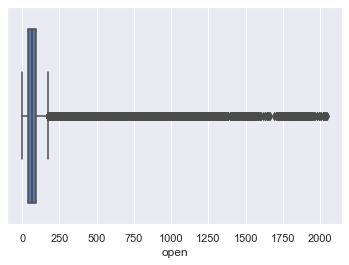

In [17]:
# Detecting outliers
sns.boxplot(x=stocks['open'])

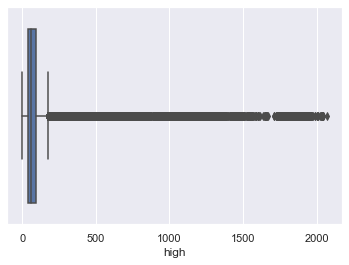

In [18]:
sns.boxplot(x=stocks['high'])

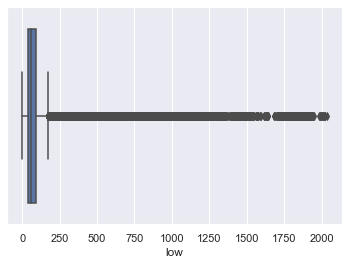

In [19]:
sns.boxplot(x=stocks['low'])

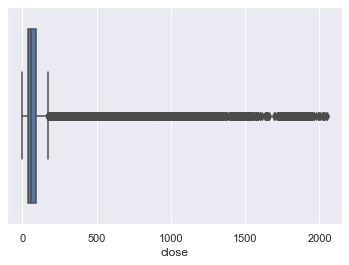

In [20]:
sns.boxplot(x=stocks['close'])

### EDA with python

1. How month/years of data is provided?
2. How many numnber of stocks?
3. Descriptive stats for each stock:

    a) overall max, min, avg, sd, variance, quantile across the time period
    
    b) Day when it has reached the max
    
    c) Overall max, min, avg, sd, variance, quantile across the time period on daily returns.. for this do daily difference
    
    d) Overall max, min, avg, sd, variance, quantile across the time period 
    for number of shares sold

C:\Users\sylve\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


(array([734503., 734869., 735234., 735599., 735964., 736330., 736695.]),
 <a list of 7 Text xticklabel objects>)

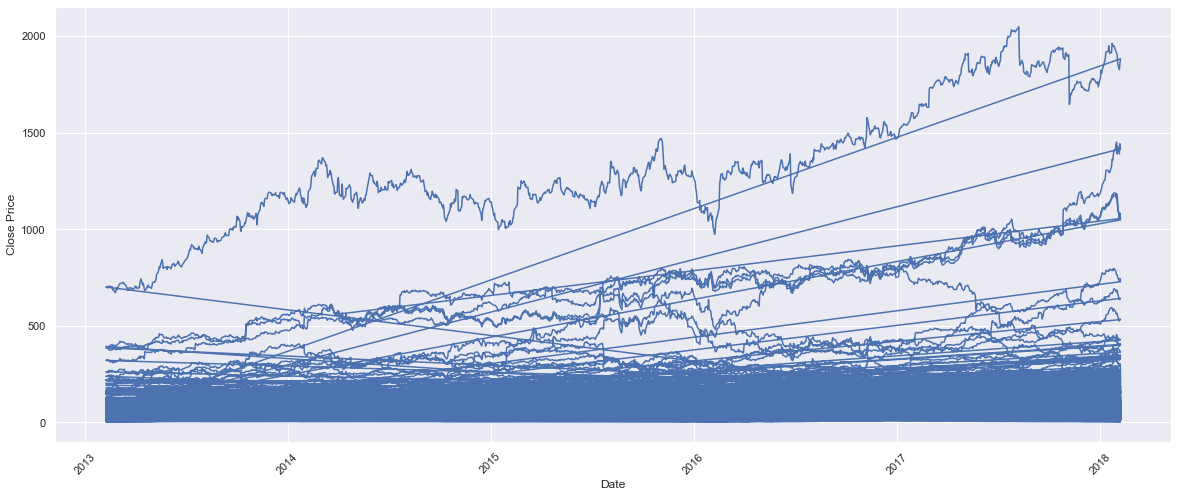

In [21]:
plt.figure(figsize=(20,8))
plt.plot('date', 'close', data=stocks)

plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(rotation=45)

#### Creating a 'daily lag' column
This basically shifts the 'Close' price by one day back.

In [22]:
stocks['Daily Lag'] = stocks['close'].shift(1)
stocks.head()

,date,open,high,low,close,volume,Name,Daily Lag
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL,NaN
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL,14.75
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL,14.46
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL,14.27
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL,14.66


The reason for creating the 'Daily Lag' is to allow us to create the column 'Daily Returns'.
Daily returns tells us the returns that we obtain in a day after the stock price closes.

#### Creating 'Daily Returns' column¶

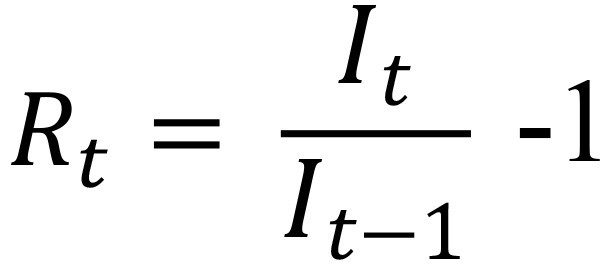

In [23]:
stocks['Daily Returns'] = (stocks['Daily Lag']/stocks['close']) - 1
stocks.head()

,date,open,high,low,close,volume,Name,Daily Lag,Daily Returns
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL,NaN,NaN
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL,14.75,0.020055
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL,14.46,0.013315
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL,14.27,-0.026603
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL,14.66,0.047891


In [24]:
mean = stocks['Daily Returns'].mean()
std = stocks['Daily Returns'].std()
print('mean =',mean)
print('Std deviation =',std)

mean = 0.0012798257271582495
Std deviation = 0.16380066830217693


#### Plotting 'Daily Returns'

In [25]:
stocks['Daily Returns'].kurtosis()

119450.1744964142

Kurtosis tells us the ‘fatness’ of the tail and it is important because it tells us how ‘extreme’ the values can get.

In our case, the value is positive, so this indicates that the chance of ‘extreme’ values are rare.

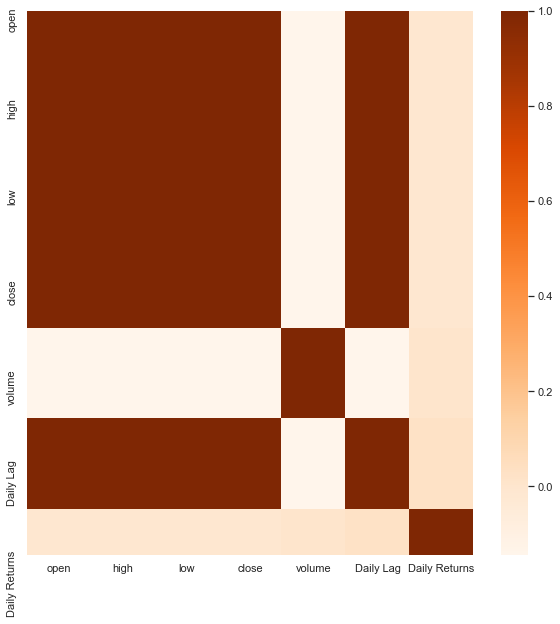

In [26]:
plt.figure(figsize=(10,10))
sns.heatmap(stocks.corr(),cmap='Oranges',annot=False) 

#### Number of stocks

In [27]:
print("Total Stocks: ", stocks.Name.unique().shape[0])

Total Stocks:  505


#### Descriptive stats for each stock

In [28]:
stocks[['Name']].describe()

,Name
count,619040
unique,505
top,NEM
freq,1259


In [29]:
stocks.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'Name', 'Daily Lag',
       'Daily Returns'],
      dtype='object')

#### Day when it reached max

In [30]:
#idx = stocks.groupby(['date'])['volume'].transform(max) == stocks['volume']
#stocks[idx]

unique_MAX =  stocks.groupby(['date'])['open', 'close', 'volume'].max().reset_index()
print(unique_MAX)

           date     open    close     volume
0    2013-02-08   693.55   700.83  158168416
1    2013-02-11   699.68   696.11  129029425
2    2013-02-12   696.80   703.38  231771561
3    2013-02-13   703.00   704.17  192478919
4    2013-02-14   699.95   705.62  143901737
...         ...      ...      ...        ...
1254 2018-02-01  1903.99  1903.69   67543333
1255 2018-02-02  1890.13  1859.10   96971924
1256 2018-02-05  1841.30  1825.93  155908256
1257 2018-02-06  1800.01  1858.66  165878399
1258 2018-02-07  1847.39  1882.68  101180515

[1259 rows x 4 columns]


#### Overall max, min, avg, sd, variance, quantile across the time period on daily returns.. for this do daily difference

In [31]:
stocks[['Daily Returns']].describe()

,Daily Returns
count,619039.000000
mean,0.001280
std,0.163801
min,-0.951608
25%,-0.008041
50%,-0.000631
75%,0.006856
max,81.833548


#### Overall max, min, avg, sd, variance, quantile across the time period for number of shares sold

In [32]:
stocks[['volume']].describe()

,volume
count,6.190400e+05
mean,4.321823e+06
std,8.693610e+06
min,0.000000e+00
25%,1.070320e+06
50%,2.082094e+06
75%,4.284509e+06
max,6.182376e+08
